In [ ]:
#A simple strategy based on candlesticks

In [1]:
#importing necesaary packages
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt

In [130]:
class day_low_sustains:

    def __init__(self , data:pd.DataFrame=None):
        
        DefaultData = pd.read_csv('Maruti.csv')
        data = data or DefaultData
        data.drop([ 'Prev Close','Total Traded Quantity','Symbol','Series','Last Price','Average Price','Turnover','No. of Trades','Deliverable Qty','% Dly Qt to Traded Qty'], axis = 1, inplace = True)
        data.columns = ['date','open','high','low','close']
        self.data = data
        self.Pnl = []
        self.cover = []
        self.sell = []
        self.sell_date = []
        self.cover_date = []
        self.finalPnl = []
        self.volume=[]
        self.fee = []
        
        
    def setup(self):
        tax = 0.01
        money=0
        vol=0
        df = self.data
        for i in range(1,len(self.data)-1):
            if (df.iloc[i].open < df.iloc[i-1].low or df.iloc[i].close<df.iloc[i-1].low) and df.iloc[i].close<df.iloc[i].open:
                sell = df.iloc[i].close #assuming I am trading near the close of day
                vol = vol + 1
                money+=sell
                fee = sell*tax
                #print(sell,vol,money,fee)
                self.sell.append(sell)
                self.sell_date.append(df.iloc[i].date)
                self.fee.append(fee)


            elif vol>0 and (df.iloc[i].close > df.iloc[i-1].close):
                cover = df.iloc[i].close
                money-=vol*cover
                fee = cover*vol*tax
                #print(cover,vol,money,fee)
                self.finalPnl.append(money)
                self.volume.append(vol)
                self.cover.append(cover)
                self.cover_date.append(df.iloc[i].date)
                self.fee.append(fee)
                vol=0


        if(vol>0):
            cover = df.iloc[i].close
            money-=cover*vol
            fee = cover*vol*tax
            #print(cover,vol,money,fee)
            self.volume.append(vol)
            self.cover.append(cover)
            self.finalPnl.append(money)
            self.cover_date.append(df.iloc[i].date)
            self.fee.append(fee)
            vol=0

        
    def trade(self):
        print("Net Gross PnL",self.finalPnl[-1])
        print("Fees",np.sum(self.fee))
        print("Net PnL: ",self.finalPnl[-1] - np.sum(self.fee))
        plt.xlabel("DATE" )
        plt.ylabel("Gross P&L")
        plt.rcParams["figure.figsize"] = (20,6)

        plt.plot(self.cover_date,self.finalPnl)
        plt.xticks(self.cover_date, rotation='vertical')
        plt.show()
                


Net Gross PnL 396.549999999992
Fees 2779.5215000000003
Net PnL:  -2382.9715000000083


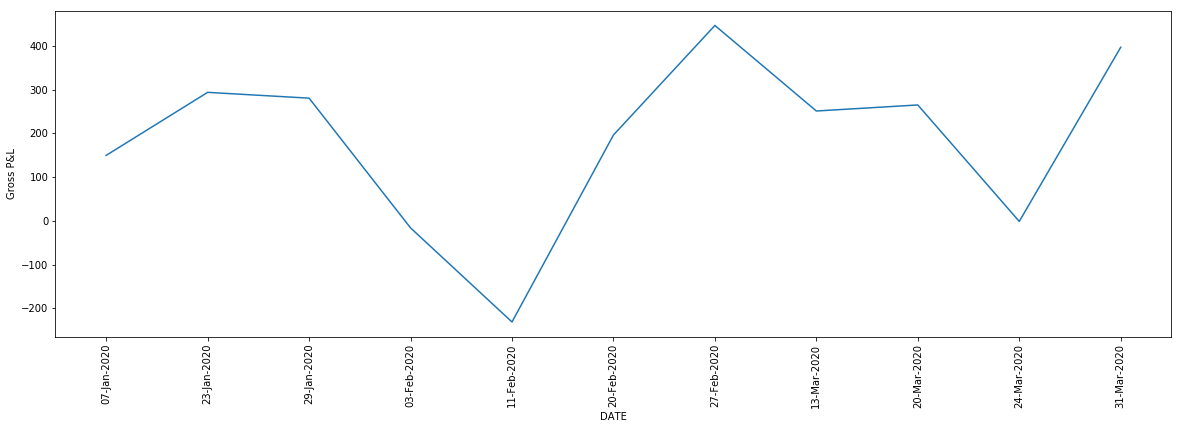

In [131]:
obj1 = day_low_sustains()
obj1.setup()
obj1.trade()

In [ ]:
#doing similar exercise for other stocks
